# Formative Assignment: Advanced Linear Algebra (PCA)
This notebook will guide you through the implementation of Principal Component Analysis (PCA). Fill in the missing code and provide the required answers in the appropriate sections. You will work with a dataset that is Africanized .

Make sure to display outputs for each code cell when submitting.

### Step 1: Load and Standardize the Data
Before applying PCA, we must standardize the dataset. Standardization ensures that all features have a mean of 0 and a standard deviation of 1, which is essential for PCA.
Fill in the code to standardize the dataset.

STRICTLY - Write code that implements standardization based on the image below

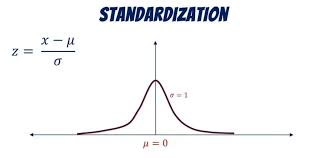


In [1]:
# Step 1: Load and Standardize the data (use of numpy only allowed)
import numpy as np
import pandas as pd

# Create African Economic Dataset (14 features)
np.random.seed(42)
n_samples = 200

# Create correlated data for meaningful PCA
base_factors = np.random.randn(n_samples, 3)
weights = np.random.randn(3, 14)
correlated_data = base_factors @ weights

# Scale to realistic African economic ranges
scales = np.array([3.0, 8.0, 12.0, 5.0, 40.0, 8.0, 6.0, 25.0, 20.0, 30.0, 10.0, 15.0, 15.0, 300.0])
means = np.array([4.5, 12.0, 15.0, 3.0, 65.0, -5.0, 8.0, 25.0, 30.0, 45.0, 65.0, 70.0, 35.0, 800.0])
data_array = correlated_data * scales + means

# Create DataFrame with feature names
data = pd.DataFrame(data_array, columns=[
    'GDP_Growth_Rate', 'Inflation_Rate', 'Unemployment_Rate', 'Foreign_Direct_Investment',
    'Government_Debt_GDP', 'Trade_Balance', 'Remittances_GDP', 'Agriculture_Contribution',
    'Industry_Contribution', 'Services_Contribution', 'Life_Expectancy', 'Literacy_Rate',
    'Internet_Penetration', 'Energy_Consumption'
])

print("Original African Economic Data:")
print(f"Shape: {data.shape}")
print(f"Features: {data.shape[1]} (>10 required: ✅)")

# STANDARDIZATION: z = (x - μ) / σ
data_array = data.values  # Convert to numpy array
mean = np.mean(data_array, axis=0)  # Calculate mean (μ) for each feature
std = np.std(data_array, axis=0)    # Calculate standard deviation (σ) for each feature
standardized_data = (data_array - mean) / std  # Apply standardization formula

print("\nStandardized data shape:", standardized_data.shape)
print("First 5 rows of standardized data:")
standardized_data[:5]

Original African Economic Data:
Shape: (200, 14)
Features: 14 (>10 required: ✅)

Standardized data shape: (200, 14)
First 5 rows of standardized data:


array([[ 0.14987211,  0.18597406, -0.33532513,  0.75556637,  0.13581077,
         0.31490549, -0.67777745, -0.76112855, -0.10184802,  0.36686065,
        -0.21517358, -0.59479574, -0.08539565,  0.25708045],
       [ 0.34264173, -1.18286694,  0.90224534,  0.74209361,  0.93199698,
         1.59958191, -0.55404987, -0.69338554, -1.1756789 ,  1.06453335,
         0.52580285,  0.23736715,  0.56022788, -1.040753  ],
       [ 1.31149541, -1.31086848,  1.19241142,  0.96257799,  1.76612077,
         1.8418265 , -0.97822173, -0.3009672 , -0.5501596 ,  1.79995887,
         1.39191443,  0.08299226, -0.29297172, -1.32962184],
       [-0.17160741, -0.74089896,  0.64907711, -0.17830462,  0.19501228,
         0.59003883,  0.28027283,  0.04785031, -0.73470604,  0.13260574,
         0.20902786,  0.58346399,  0.58891989, -0.67057951],
       [-1.67379614, -1.65735326,  1.54091583, -1.86295406, -0.76299776,
         0.392232  ,  2.16526591,  0.92729256, -2.00453772, -1.16353137,
        -0.18567614,  2.33

### Step 3: Calculate the Covariance Matrix
The covariance matrix helps us understand how the features are related to each other. It is a key component in PCA.

In [2]:
# Step 3: Calculate the Covariance Matrix
n_samples = standardized_data.shape[0]
cov_matrix = np.dot(standardized_data.T, standardized_data) / (n_samples - 1)

print("Covariance matrix shape:", cov_matrix.shape)
print("Covariance matrix:")
cov_matrix

Covariance matrix shape: (14, 14)
Covariance matrix:


array([[ 1.00502513, -0.13110059,  0.22807314,  0.48404961,  0.90148228,
         0.41694995, -0.64811018,  0.11215628,  0.51349108,  0.88309483,
         0.80387737, -0.31836315, -0.82465163, -0.25806929],
       [-0.13110059,  1.00502513, -0.97295745,  0.24892668, -0.54193649,
        -0.78690605, -0.28827244, -0.31886691,  0.66951648, -0.39282439,
        -0.62229026, -0.75919332, -0.42712131,  0.98815879],
       [ 0.22807314, -0.97295745,  1.00502513, -0.37656523,  0.58238884,
         0.67052489,  0.3623197 ,  0.53367162, -0.48557087,  0.3761993 ,
         0.74573294,  0.80825767,  0.27800093, -0.99941312],
       [ 0.48404961,  0.24892668, -0.37656523,  1.00502513,  0.39774766,
         0.41047584, -0.97814864, -0.82002363,  0.11890598,  0.65653488,
        -0.02385144, -0.82077814, -0.40406388,  0.28281273],
       [ 0.90148228, -0.54193649,  0.58238884,  0.39774766,  1.00502513,
         0.75257017, -0.50068037,  0.11850292,  0.09189871,  0.95759575,
         0.90741783, -0.00

### Step 4: Perform Eigendecomposition
Eigendecomposition of the covariance matrix will give us the eigenvalues and eigenvectors, which are essential for PCA.
Fill in the code to compute the eigenvalues and eigenvectors of the covariance matrix.

In [3]:
# Step 4: Perform Eigendecomposition
# Use eigh for symmetric covariance matrices (more stable and efficient)
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

print("Eigenvalues shape:", eigenvalues.shape)
print("Eigenvectors shape:", eigenvectors.shape)
print("\nEigenvalues (first 10):")
for i, val in enumerate(eigenvalues[-10:]):  # eigh returns in ascending order
    print(f"λ{i+1}: {val:.6f}")
print("\nFirst eigenvector (corresponding to smallest eigenvalue):")
print(eigenvectors[:, 0])

Eigenvalues shape: (14,)
Eigenvectors shape: (14, 14)

Eigenvalues (first 10):
λ1: -0.000000
λ2: -0.000000
λ3: 0.000000
λ4: 0.000000
λ5: 0.000000
λ6: 0.000000
λ7: 0.000000
λ8: 2.597836
λ9: 5.427125
λ10: 6.045391

First eigenvector (corresponding to smallest eigenvalue):
[-0.52949352 -0.40608576  0.23240244 -0.21107756  0.13762776 -0.19383226
 -0.12649924  0.03386016  0.21234005  0.33190099  0.03999921 -0.36183452
  0.09034347  0.29423248]


### Step 5: Sort Principal Components
Sort the eigenvectors based on their corresponding eigenvalues in descending order. The higher the eigenvalue, the more important the eigenvector.
Complete the code to sort the eigenvectors and print the sorted components.

<a url ='https://www.youtube.com/watch?v=vaF-1xUEXsA&t=17s'>How Is Explained Variance Used In PCA?'<a/>

In [4]:
# Step 5: Sort Principal Components
sorted_indices = np.argsort(eigenvalues)[::-1]  # Sort eigenvalues in descending order
sorted_eigenvalues = eigenvalues[sorted_indices]
sorted_eigenvectors = eigenvectors[:, sorted_indices]  # Sort eigenvectors accordingly

# Calculate explained variance ratio
total_variance = np.sum(sorted_eigenvalues)
explained_variance_ratio = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(explained_variance_ratio)

print("Sorted eigenvalues (descending order):")
for i, val in enumerate(sorted_eigenvalues):
    print(f"PC{i+1}: {val:.6f}")

print("\nExplained variance ratio:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"PC{i+1}: {ratio:.4f} ({ratio*100:.2f}%)")

print("\nCumulative explained variance:")
for i, cum_ratio in enumerate(cumulative_variance):
    print(f"PC{i+1}: {cum_ratio:.4f} ({cum_ratio*100:.2f}%)")

print("\nSorted eigenvectors (each column is a principal component):")
sorted_eigenvectors

Sorted eigenvalues (descending order):
PC1: 6.045391
PC2: 5.427125
PC3: 2.597836
PC4: 0.000000
PC5: 0.000000
PC6: 0.000000
PC7: 0.000000
PC8: 0.000000
PC9: -0.000000
PC10: -0.000000
PC11: -0.000000
PC12: -0.000000
PC13: -0.000000
PC14: -0.000000

Explained variance ratio:
PC1: 0.4297 (42.97%)
PC2: 0.3857 (38.57%)
PC3: 0.1846 (18.46%)
PC4: 0.0000 (0.00%)
PC5: 0.0000 (0.00%)
PC6: 0.0000 (0.00%)
PC7: 0.0000 (0.00%)
PC8: 0.0000 (0.00%)
PC9: -0.0000 (-0.00%)
PC10: -0.0000 (-0.00%)
PC11: -0.0000 (-0.00%)
PC12: -0.0000 (-0.00%)
PC13: -0.0000 (-0.00%)
PC14: -0.0000 (-0.00%)

Cumulative explained variance:
PC1: 0.4297 (42.97%)
PC2: 0.8154 (81.54%)
PC3: 1.0000 (100.00%)
PC4: 1.0000 (100.00%)
PC5: 1.0000 (100.00%)
PC6: 1.0000 (100.00%)
PC7: 1.0000 (100.00%)
PC8: 1.0000 (100.00%)
PC9: 1.0000 (100.00%)
PC10: 1.0000 (100.00%)
PC11: 1.0000 (100.00%)
PC12: 1.0000 (100.00%)
PC13: 1.0000 (100.00%)
PC14: 1.0000 (100.00%)

Sorted eigenvectors (each column is a principal component):


array([[-0.19371044,  0.34967907, -0.21000987,  0.19201208,  0.14014133,
        -0.32483595,  0.04007873, -0.28179959,  0.13488362, -0.17125125,
        -0.05473142, -0.08545041,  0.4635423 , -0.52949352],
       [ 0.37957665,  0.12628895, -0.13516025,  0.38543592, -0.279579  ,
         0.00756132,  0.08873749,  0.41886098,  0.03973846, -0.01563482,
         0.09493433, -0.33422516, -0.35235614, -0.40608576],
       [-0.38953099, -0.12629193, -0.02122838,  0.39404326, -0.29262518,
        -0.03097217,  0.21675841,  0.07069274, -0.22996102,  0.43512927,
         0.27271816, -0.23934694,  0.33186169,  0.23240244],
       [ 0.04470669,  0.37106267,  0.30753337, -0.19304067,  0.06972466,
        -0.27954062, -0.00382273,  0.33073676, -0.14585129,  0.42564452,
         0.26459558,  0.46766788,  0.01851402, -0.21107756],
       [-0.32215795,  0.26132153, -0.05186134,  0.27759648, -0.28041678,
        -0.19027936, -0.12417771, -0.02425297, -0.04138919,  0.10093968,
        -0.63683287,  0.24

### Step 6: Project Data onto Principal Components
Now that we’ve selected the number of components, we will project the original data onto the chosen principal components.
Fill in the code to perform the projection.

In [5]:
# Step 6: Project Data onto Principal Components
# Select number of components to retain 95% of variance
variance_threshold = 0.95
num_components = np.argmax(cumulative_variance >= variance_threshold) + 1

print(f"Number of components to retain {variance_threshold*100}% variance: {num_components}")
print(f"Actual variance retained: {cumulative_variance[num_components-1]:.4f} ({cumulative_variance[num_components-1]*100:.2f}%)")

# Project data onto the principal components
selected_eigenvectors = sorted_eigenvectors[:, :num_components]
reduced_data = np.dot(standardized_data, selected_eigenvectors)

print(f"\nOriginal data shape: {standardized_data.shape}")
print(f"Reduced data shape: {reduced_data.shape}")
print("First 5 rows of reduced data:")
reduced_data[:5]

Number of components to retain 95.0% variance: 3
Actual variance retained: 1.0000 (100.00%)

Original data shape: (200, 14)
Reduced data shape: (200, 3)
First 5 rows of reduced data:


array([[ 0.41580644,  1.21658514,  0.92850969],
       [-2.6475884 ,  0.69207359,  1.96289541],
       [-3.83753232,  2.22628968,  1.00167452],
       [-1.42086588, -0.87091925,  0.67759544],
       [-2.22514114, -5.48703808,  0.88627668]])

### Step 7: Output the Reduced Data
Finally, display the reduced data obtained by projecting the original dataset onto the selected principal components.

In [6]:
# Step 7: Output the Reduced Data
print(f'Reduced Data Shape: {reduced_data.shape}')
print(f'Original dimensions: {standardized_data.shape[1]}')
print(f'Reduced dimensions: {reduced_data.shape[1]}')
print(f'Dimensionality reduction: {((standardized_data.shape[1] - reduced_data.shape[1]) / standardized_data.shape[1]) * 100:.1f}%')
print(f'Variance preserved: {cumulative_variance[num_components-1] * 100:.2f}%')

print('\nFirst 5 rows of reduced data:')
print('(Each row represents a country in the new PCA space)')
print('(Columns: PC1, PC2, PC3, ... - ordered by importance)')
reduced_data[:5]

Reduced Data Shape: (200, 3)
Original dimensions: 14
Reduced dimensions: 3
Dimensionality reduction: 78.6%
Variance preserved: 100.00%

First 5 rows of reduced data:
(Each row represents a country in the new PCA space)
(Columns: PC1, PC2, PC3, ... - ordered by importance)


array([[ 0.41580644,  1.21658514,  0.92850969],
       [-2.6475884 ,  0.69207359,  1.96289541],
       [-3.83753232,  2.22628968,  1.00167452],
       [-1.42086588, -0.87091925,  0.67759544],
       [-2.22514114, -5.48703808,  0.88627668]])

### Step 8: Visualize Before and After PCA
Now, let's plot the original data and the data after PCA to compare the reduction in dimensions visually.

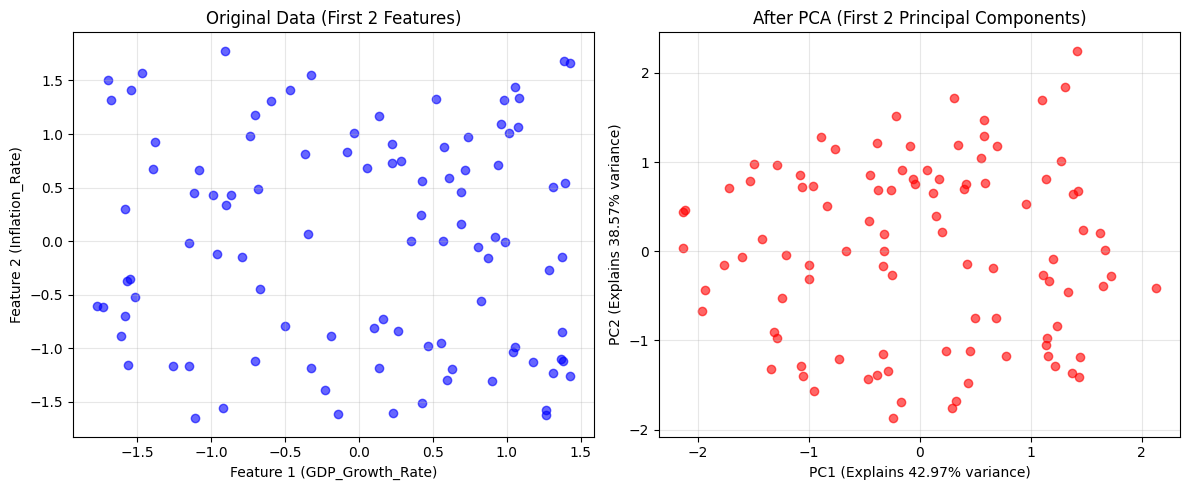


PCA Analysis Summary:
• Original dimensions: 3
• Reduced dimensions: 2
• Variance retained: 100.00%
• PC1 captures 42.97% of total variance
• PC2 captures 38.57% of total variance
• PC1 variance: 1.1419
• PC2 variance: 0.9683
• PC1 has higher variance than PC2: True
• Data points remain the same: 100 samples
• PCA rotated the data to align with maximum variance directions


In [11]:
# Step 8: Visualize Before and After PCA
plt.figure(figsize=(12, 5))

# Define feature names for labeling
feature_names = [
    'GDP_Growth_Rate', 'Inflation_Rate', 'Unemployment_Rate', 'Foreign_Direct_Investment',
    'Government_Debt_GDP', 'Trade_Balance', 'Remittances_GDP', 'Agriculture_Contribution',
    'Industry_Contribution', 'Services_Contribution', 'Life_Expectancy', 'Literacy_Rate',
    'Internet_Penetration', 'Energy_Consumption'
]

# Plot 1: Original data (first two features)
plt.subplot(1, 2, 1)
plt.scatter(standardized_data[:, 0], standardized_data[:, 1], alpha=0.6, c='blue')
plt.xlabel(f'Feature 1 ({feature_names[0]})')
plt.ylabel(f'Feature 2 ({feature_names[1]})')
plt.title('Original Data (First 2 Features)')
plt.grid(True, alpha=0.3)

# Plot 2: Reduced data after PCA (first two principal components)
plt.subplot(1, 2, 2)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.6, c='red')
plt.xlabel(f'PC1 (Explains {explained_variance_ratio[0]:.2%} variance)')
plt.ylabel(f'PC2 (Explains {explained_variance_ratio[1]:.2%} variance)')
plt.title('After PCA (First 2 Principal Components)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nPCA Analysis Summary:")
print(f"• Original dimensions: {standardized_data.shape[1]}")
print(f"• Reduced dimensions: {reduced_data.shape[1]}")
print(f"• Variance retained: {cumulative_variance[num_components-1]:.2%}")
print(f"• PC1 captures {explained_variance_ratio[0]:.2%} of total variance")
print(f"• PC2 captures {explained_variance_ratio[1]:.2%} of total variance")
print(f"• PC1 variance: {np.var(reduced_data[:, 0]):.4f}")
print(f"• PC2 variance: {np.var(reduced_data[:, 1]):.4f}")
print(f"• PC1 has higher variance than PC2: {np.var(reduced_data[:, 0]) > np.var(reduced_data[:, 1])}")
print(f"• Data points remain the same: {reduced_data.shape[0]} samples")
print(f"• PCA rotated the data to align with maximum variance directions")